In [58]:
import pandas as pd
from sklearn import svm
import numpy as np
from sklearn.model_selection import ShuffleSplit
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

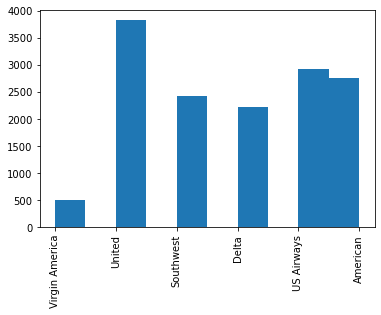

In [33]:
df = pd.read_csv(
    'Tweets.csv')
plt.hist(df['airline'])
plt.xticks(rotation=90)
plt.show()

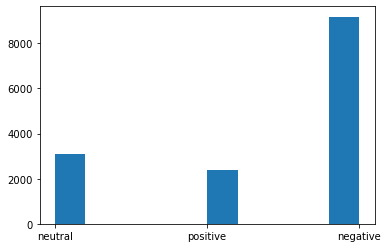

In [34]:
plt.hist(df['sentiment'])
plt.xticks(np.arange(0, 3,1))
plt.show()

       sentiment                                               text
0              1               plus add commercial experience tacky
1              0  really aggressive blast obnoxious entertainmen...
2              0                               really big bad thing
3              0  seriously would pay flight seat play really ba...
4              1    yes nearly every time fly vx  ear worm  go away
...          ...                                                ...
11531          0  flight cancel flightled leave tomorrow morning...
11532          0                            right cue delay ok hand
11533          1                 thank get different flight chicago
11534          0  leave minute late flight warn communication mi...
11535          0  money change flight answer phone suggestion ma...

[11536 rows x 2 columns]


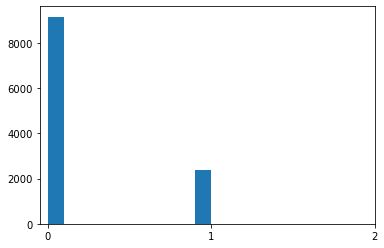

In [59]:
col_list1=['sentiment','text']
data = pd.read_csv(r"result-2.csv", usecols=col_list1)
print(data)
plt.hist(data['sentiment'])
plt.xticks(np.arange(0, 3,1))
plt.show()

In [29]:
model = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)

In [22]:
model=LogisticRegression(penalty = 'l2',random_state = 0)

In [60]:
model = KNeighborsClassifier(n_neighbors=2)

In [61]:
vect = TfidfVectorizer()

tf_idf = TfidfVectorizer(
                    ngram_range = (1,2),
                    max_features = 70000,binary=True,max_df=0.9)

In [62]:
X = data['text']
y = data['sentiment']
ss = ShuffleSplit(n_splits=12, test_size=0.1)
precisionArray=[]
recallArray=[]
fscoreArray=[]
accuracyArray=[]


for train_index, test_index in ss.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit vectorizer and transform X train, then transform X test
    X_train_vect = tf_idf.fit_transform(X_train.astype('U'))
    # X_test_vect = vect.transform(X_test.astype('U'))
    X_test_vect = tf_idf.transform(X_test.astype('U'))

    model.fit(X_train_vect, y_train)
    y_pred = model.predict(X_test_vect)
    precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='macro')
    precisionArray.append(precision)
    recallArray.append(recall)
    fscoreArray.append(fscore)
    accuracyArray.append(accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))
print("\n")
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       909
           1       0.75      0.56      0.64       245

    accuracy                           0.87      1154
   macro avg       0.82      0.75      0.78      1154
weighted avg       0.86      0.87      0.86      1154





array([[864,  45],
       [108, 137]], dtype=int64)

In [66]:
#vectorizer = CountVectorizer()
#vectorizer.fit(X_train.values.ravel())
#X_train=vectorizer.transform(X_train.values.ravel())
#X_test=vectorizer.transform(X_test.values.ravel())
#X_train=X_train.toarray()
#X_test=X_test.toarray()

#sm = SMOTE()

#x_train = pd.DataFrame(X_train)
#X_resample, y_resampled = SMOTE().fit_resample(X_train, y_train)

#x_train = pd.DataFrame(X_train_vect)
#X_train_new, y_train_new = sm.fit_resample(x_train, X_test_vect)

#plt.hist(y)
#plt.xticks(np.arange(0, 2,1))
#plt.show()
#print(counter)

#### MultinomialNB 
precision: 0.9056974399407101

recall: 0.5846138041140249

fscore: 0.5962427946707881

accuracy: 0.8303726169844022

##### alpha=1.0, fit_prior=True, class_prior=None

 precision    recall  f1-score   support

           0       0.83      1.00      0.91       926
           1       1.00      0.20      0.33       228

    accuracy                           0.84      1154
    
    macro avg       0.92      0.60      0.62      1154
    
    weighted avg       0.87      0.84      0.80      1154


#### LogisticRegression

precision: 0.8987716977883323

recall: 0.7756743577684949

fscore: 0.8174665328686332

accuracy: 0.8988301559792027

##### penalty = 'l2'  random_state = 0

precision    recall  f1-score   support

           0       0.90      0.99      0.94       921
           1       0.91      0.58      0.71       233

    accuracy                           0.90      1154

    macro avg       0.91      0.78      0.82      1154
   
    weighted avg       0.90      0.90      0.89      1154

#### ShuffleSplit(n_splits=20, test_size=0.2)

precision: 0.8962883789481275

recall: 0.773019051345958

fscore: 0.814555036332985

accuracy: 0.8967287694974002

#### KNeighborsClassifier

precision: 0.7880709240629341

recall: 0.7912679928971146

fscore: 0.7894401647423771

accuracy: 0.8613518197573659

##### n_neighbors=2

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       909
           1       0.75      0.56      0.64       245

    accuracy                           0.87      1154
    
    macro avg       0.82      0.75      0.78      1154
    
    weighted avg       0.86      0.87      0.86      1154


In [63]:
X_train, X_test, y_train, y_test = train_test_split(data['text'].astype('U'), data['sentiment'].astype('float'), test_size=0.4, random_state=30)

In [64]:
X_train_set = vect.fit_transform(X_train)
X_test_set = vect.transform(X_test)

model.fit(X_train_set, y_train)
y_pred = model.predict(X_test_set)
precision, recall, fscore, support = precision_recall_fscore_support(y_test,y_pred,average='macro')

print(classification_report(y_test, y_pred))
print("\n")
confusion_matrix(y_test, y_pred)



              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91      3651
         1.0       0.74      0.47      0.58       964

    accuracy                           0.85      4615
   macro avg       0.80      0.71      0.74      4615
weighted avg       0.84      0.85      0.84      4615





array([[3487,  164],
       [ 507,  457]], dtype=int64)

#### MultinomialNB 

accuracy: 0.8426868905742145

precision: 0.9092423151285759

recall: 0.6249708770745468

fscore: 0.6547381546134663


##### alpha=1.0, fit_prior=True, class_prior=None

              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91      3651
         1.0       0.98      0.25      0.40       964

    accuracy                           0.84      4615
    
    macro avg       0.91      0.62      0.65      4615
    
    weighted avg       0.87      0.84      0.80      4615


#### LogisticRegression

accuracy: 0.8964247020585049

precision: 0.9018222513621668

recall: 0.7726877533694514

fscore: 0.8154459609054683


##### test_size=0.2

accuracy: 0.8535211267605634

precision: 0.7783149061721737

recall: 0.77916355548585

fscore: 0.7787377011881642

##### pa cross validation

accuracy: 0.8973136915077989

precision: 0.8866397125623041

recall: 0.7760630937242876

fscore: 0.8151005478404634

##### penalty = 'l2'  random_state = 0

              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94      3651
         1.0       0.91      0.56      0.69       964

    accuracy                           0.90      4615
    
    macro avg       0.90      0.77      0.82      4615
    
    weighted avg       0.90      0.90      0.89      4615

#### KNeighborsClassifier

accuracy: 0.8535211267605634

precision: 0.7783149061721737

recall: 0.77916355548585

fscore: 0.7787377011881642

##### n_neighbors=2

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91      3651
         1.0       0.74      0.47      0.58       964

    accuracy                           0.85      4615
    
    macro avg       0.80      0.71      0.74      4615
    
    weighted avg       0.84      0.85      0.84      4615


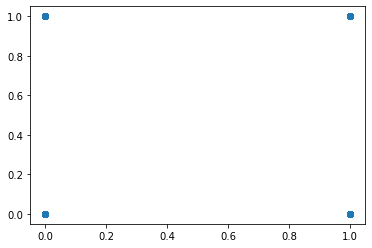

In [65]:
plt.scatter(y_test,y_pred)

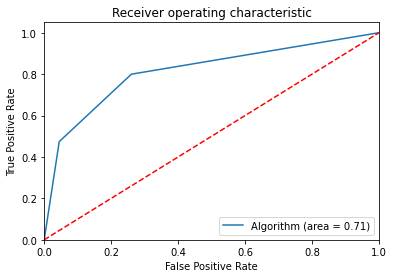

In [67]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test_set))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_set)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Algorithm (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()